In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Probability

Let's explore the probability of any two people having the same birthday out of a group of people.

First:  what is the probability of a person having a specific birthday out of the year?

Assume to simplfy the problem:  The year is 365 days and that there is a equally likely to to be on any of the days, independently from the other people in the group.  

In [2]:
1/365

0.0027397260273972603

What is probability of a specific birthday out of 1 million people?

Let's set up a simulation of 1,000,000 people in a room and look at the distribution of their birthdays, numbering the days as 1 to 365.

In [3]:
#  import the uniform discrete function
from scipy.stats import randint
# 1 million people's birthdays
randomvarUniform_oneM=randint.rvs(1,366,size=1000000)
#print(randomvarUniform_oneM)

<AxesSubplot:ylabel='Count'>

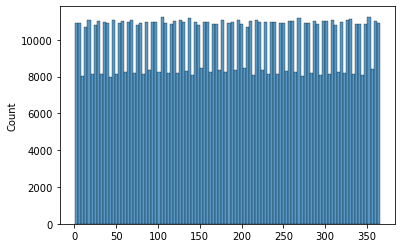

In [4]:
sns.histplot(randomvarUniform_oneM,stat='count',bins='auto')

<AxesSubplot:ylabel='Density'>

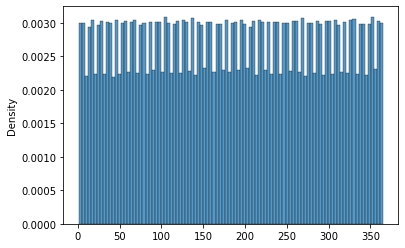

In [5]:
sns.histplot(randomvarUniform_oneM,stat='density',bins='auto')

The law of large numbers (LLN) is a theorem in probability that describes the result of performing the same experiment a large number of times. The average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed.  The LLN is important because it guarantees stable long-term results for the averages of random events.

This looks pretty close to the long-run probability that we found using 1/365 = 0.0027

Now let's look at the probability using 50 people.  Since this is not a large number for our sample of the true distribution, we will probably have a imperfect understanding of the underlying probability, but it will be our best guess.

In [6]:
# 50 people's birthdays
randomvarUniform_fifty=randint.rvs(1,366,size=50)
print(randomvarUniform_fifty)

[131 208 256  77 108 300 133 202 148  79 189   5  17  72 300 104 165 352
 208 151 180  34 353 113  57 190 333 247 129   6 120 134 188 105  98  19
 273 133  63 247  11 300 230  13  22 124  47 199 197  44]


<AxesSubplot:ylabel='Count'>

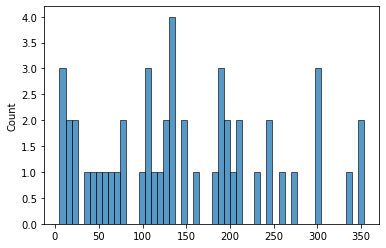

In [7]:
sns.histplot(randomvarUniform_fifty,stat='count',bins=50)

<AxesSubplot:ylabel='Density'>

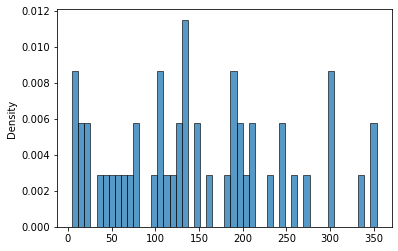

In [8]:
sns.histplot(randomvarUniform_fifty,stat='density',bins=50)

It looks like several people have the same birthday! The empirical probability of having the same birthday is higher than that of having any specific birthday.  Does this suprise you?  This is the foundation of the probability birthday problem: What is the probability of at least 2 people having the same birthday in some group of size n?

Before we find this, let's change the question and ask:  What is the probability of of finding two people in our group of 50 with the same specific birthday? 

Probability of event A (1st Person having birthday on day 1) AND probability of event B (2nd Person having birthday on day 1)?

What is the relevant probability law?  
**Statistically independent events: Use the specific multiplication law of probability.**  

P(1stPerson) = 1/365 = 0.0027  
P(2ndPerson) = 1/365 = 0.0027  

P (A AND B) = P(1stPerson) * P(2ndPerson)= 0.0027 * 0.0027 = 0.0000073

What is the probability of 5 people having the same speicfic birthday?

P(A AND B AND C AND D AND E) = 0.0027^5 = 1.43*e-13
            
These are low chances!  This is what we are generally thinking about for the birthday problem.  

In [9]:
0.0027**5

1.4348907000000003e-13

**Complement Rule**

What is the probability of at least 1 of these 5 people having the specifc birthday?

Because the event of at least 1 person having a specific birthday is mutually exclusive to the event of having no one with the specific birthday, you can use the complement rule to state that P(at least 1 person) = 1 - P(no persons).  The entire probabilities of the event have to add up to 1. 

The probability of no persons in the group of 5 having the specific birthday = (364/365)^5 = (0.997)^5 = 0.986

So the probability of at least 1 person in group of 5 = 1 - P(no persons) = 1 - 0.986 ~ 0.014

**Conditional Probability**

But the birthday problem is asking: What is the probability of at least 2 people having a shared birthday in some group of size n? 

To compute this we can turn to permutations or to conditional probability. 

What is the probability of a 2nd person having a birthday GIVEN that a first person has a specific birthday?  This is a dependent or non-independent event.  This opens up all of the comparisions for each person against each person.

P(2ndPerson|1stPerson) = P(B|A) = $\frac{P(A (AND) B)}{P(A)}$

P(A AND B) = P(A) * P(B|A)

It is easier to find the complement of the probability of no two people in the group have a shared birthday, so invoke the complement rule:      

P(at least 2 people with a shared birthday) = 1 - P(no people with a shared birthday)

P(A AND B) = probability that no 2 people share a birthday

Let's find the probability of no 2 people sharing a birthday out of 5 people.

= P(A) * P(B|A) * P(C|B) * P(D|C) * P(E|D)
= 1 * (365-1)/365 * (365-2)/365 * (365-3)/365 * (365-4)/365 * (365-5)/365  
= 1 * 0.997 * 0.995 * 0.992 * 0.989   
= 0.973

P(at least 2 sharing a birthday in 5 people) = 1 - 0.973 = 0.027

Generalized rule for this problem:  1*(364/365)*(363/365)*...*(365-n+1)/365) 

We can find this generalized form for n=5:

In [10]:
import math
nBDay= 5
BDayParadoxProb=1-((math.factorial(365))/(((365**nBDay) *math.factorial(365-nBDay))))

In [11]:
BDayParadoxProb

0.02713557369979358

And then use it to graph the probabilities a range of n

In [12]:
def BDayParadoxProbi(nBDayi):
    BDayParadoxProbA=[]
    for i in range(1,nBDayi+1):
            BDayParadoxProb=1-((math.factorial(365))/(((365**i) *math.factorial(365-i))))
            BDayParadoxProbA.append(BDayParadoxProb)
            #print(BDayParadoxProbA)
    return BDayParadoxProbA

In [13]:
nBDayi=5
BDayParadoxAA=BDayParadoxProbi(nBDayi)
print(BDayParadoxAA)

[0.0, 0.002739726027397249, 0.008204165884781345, 0.016355912466550326, 0.02713557369979358]


C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'probability')

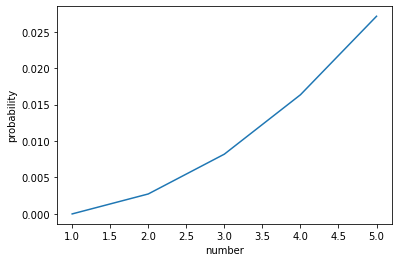

In [14]:
sns.lineplot(range(1,nBDayi+1),BDayParadoxAA)
plt.xlabel("number")
plt.ylabel("probability")

In [15]:
nBDayi=80
BDayParadoxAA=BDayParadoxProbi(nBDayi)
print(BDayParadoxAA)

[0.0, 0.002739726027397249, 0.008204165884781345, 0.016355912466550326, 0.02713557369979358, 0.040462483649111536, 0.056235703095975365, 0.07433529235166902, 0.09462383388916673, 0.11694817771107768, 0.141141378321733, 0.16702478883806438, 0.19441027523242937, 0.223102512004973, 0.25290131976368635, 0.2836040052528499, 0.31500766529656066, 0.34691141787178936, 0.37911852603153673, 0.41143838358057994, 0.4436883351652058, 0.4756953076625501, 0.5072972343239854, 0.5383442579145288, 0.5686997039694639, 0.598240820135939, 0.626859282263242, 0.6544614723423994, 0.680968537477777, 0.7063162427192686, 0.7304546337286438, 0.7533475278503207, 0.774971854175772, 0.7953168646201543, 0.8143832388747152, 0.8321821063798795, 0.8487340082163846, 0.8640678210821209, 0.878219664366722, 0.891231809817949, 0.9031516114817354, 0.9140304715618692, 0.9239228556561199, 0.9328853685514263, 0.940975899465775, 0.9482528433672547, 0.9547744028332994, 0.9605979728794224, 0.9657796093226765, 0.9703735795779884, 0.

The birthday paradox is that the number of people needed in a group seems low to have a birthday match.  Here we graph a group of 80 and see what the probability of a shared birthday (a match) is.  It turns out that the probability of a shared birthday exceeds 50% (is 50.7%) with a n=23 in a group! 

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'probability')

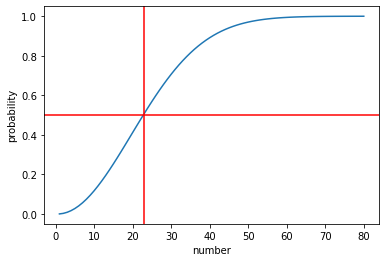

In [16]:
sns.lineplot(range(1,nBDayi+1),BDayParadoxAA)
plt.axhline(y=0.5,color="red")
plt.axvline(x=23,color="red")
plt.xlabel("number")
plt.ylabel("probability")

# Probability in Flow Diagrams or Circuits

![](PicTutorial2CircuitsProb.png)

What is the probability of the circuit working?

P(A)=0.9; P(B)=0.95, P(C)=0.99.  The probability of working are independent of each other.  What is the probability of the circuit working?

Partition the graph into groupings.  The first left column works if any or all of the circuit works; these are the general form of either or occuring (not mutually exclusive).  This is an OR or UNION problem for A.  The second group works if any or all of the circuits work for B.  The circuit then works if the independent A circuit work AND the B cicuit works and the C cicuit works.  

P(A1)=P(A OR A) = P(A) + P(A) - P(A AND A) = 0.9 +0.9 - 0.9 * 0.9 = 0.99
P(A2)= P(A1 OR A) = P(A1) + P(A) - P(A1 AND A)= 0.99 + 0.9 - (.99*.9) = 0.999

P(B1) = P(B OR B) = P(B) + P(B) - P(B AND B) = 0.95 +0.95 - (0.95 * 0.95) = 0.9975

P(C) = 0.99

P(A2 AND B1 AND C) = 0.999 * 0.9975 * 0.99 = 0.9865

You could also calculate the columns with the complement of all of them failing, so that the probability of any of them working in column A is 1-(all of them failing) = 1-(0.1)^3 = 0.999

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Probability Distributions

We will start with a simple discrete probability distribution: the Discrete Uniform Distribution.  In python this is the randint distribution.  The discreet uniform distribution with parameters (a,b) constructs a random variable that has an equal probability of being any one of the intergers in the range of [a,b].  An example is rolling a fair 6 sided die.  [See scipy documentation radnint.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)

In [18]:
#  import the uniform discrete function
from scipy.stats import randint
#  the low value for a fair die s 1 and the high value is 6; there are 6 possible and equaly likely outcomes
# the pmf = 1/(b-a+1) or 1/n
n=6
# you can run an emperical experiment or simulation to see the emperical probability of the outcome
# if you generate random numbers usng a discrete probability distribution then you can plot these
#  Lets roll a fair sided die; for the interval of low=low, high=high-1
# Here we are saying that there aee 6 outcomes, each of equal probability
# We are using the .rsv atribute to produce random variables that fit the specified probability dstribution
randomvarUniform=randint.rvs(1,7,loc=0)
print(randomvarUniform)

2


In [19]:
# let's roll the die 10 times
randomvarUniform=randint.rvs(1,7,size=10)
print(randomvarUniform)

[5 1 1 5 3 6 6 3 1 2]


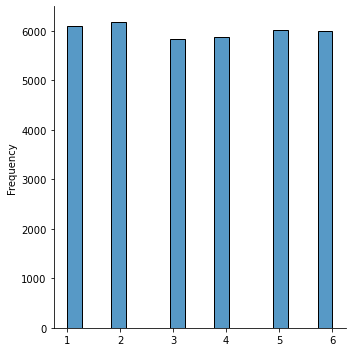

In [20]:
# let's roll it 10,000 times and plot it on a frequency histogram
randomvarUniform=randint.rvs(1,7,size=10000)
ax=sns.displot(randomvarUniform,stat='frequency')

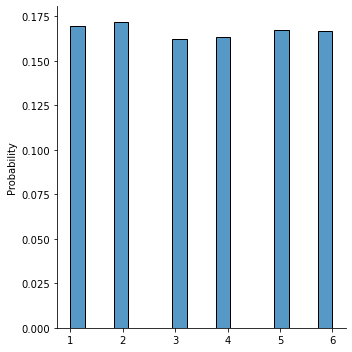

In [21]:
# let's see it as a probability plot
# now can see the emperical probabilities of each outcome is around 0.16667
ax=sns.displot(randomvarUniform,stat='probability')

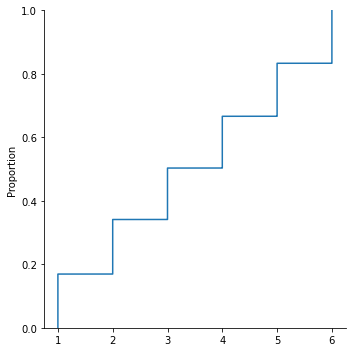

In [22]:
# Plotting the emperical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax=sns.displot(randomvarUniform,kind='ecdf')

In [23]:
# now let's find and plot the theoretical prbability mass function (pmf) based on knowing the parametrs of the distribution
n=6
p=1/n
x=np.arange(1,n+1)
uniformDiscrete_pmf=randint.pmf(x,1,7)
print(uniformDiscrete_pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [24]:
# This is the same as finding the uniform discrete pmf of the nmbers 1,2,3,4,5,6 using the pmf formula:  PMF=1/n
# now plot the pmf

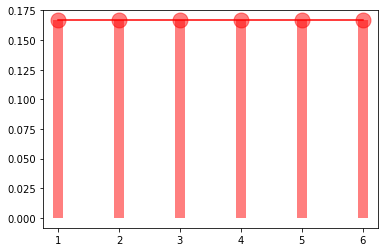

In [25]:
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.plot(x,uniformDiscrete_pmf,'r')
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

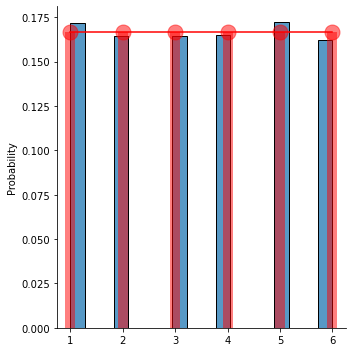

In [26]:
# Let's show the probability distribution on the plot of the emperical probabilities
randint_rvs=randint.rvs(1,7,size=10000)
ax=sns.displot(randint_rvs,stat='probability')
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.plot(x,uniformDiscrete_pmf,'r')
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

In [27]:
# The cumulative distribution function shows the cumulative probability that X wil take on a value less than or equal to x
# compute and plot the cdf of a uniform discrete distribution

In [28]:
x=np.arange(1,n+1,1)
uniformDiscrete_cdf=randint.cdf(x,1,7)
print(uniformDiscrete_cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


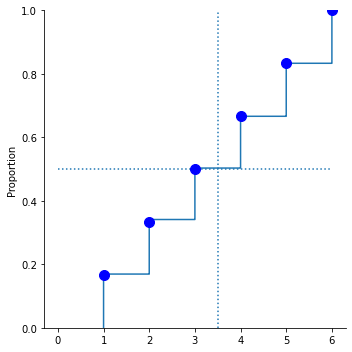

In [29]:
#  plot the cdf of the probabilites as a step function
ax1=sns.displot(randomvarUniform,kind='ecdf')
plt.hlines(0.5,0,6,linestyle=":")
plt.vlines(3.5,0,1,linestyle=":")
plt.plot(x,uniformDiscrete_cdf,'bo',ms=10)

In [30]:
# expected value or mean of the distribution
randint.mean(1,7)

3.5

In [31]:
# at what value x is 50% (0.5 of the total probability) accounted for?
# What is the 50th percentile of this distribution?
# q= percentile=0.5
# ppf is percent point function (inverse of cdf)
randint.ppf(0.5,1,7)

3.0

In [32]:
# variance of the distribution
randint.var(1,7)

2.9166666666666665

# The binomial distribution
Use the [binomial distribution from scipy stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).  binom takes the number of trials and the probability of a success as shape parameters, where p is the probability of a single success and 1-p is the probability of a single failure. Rember BINS.

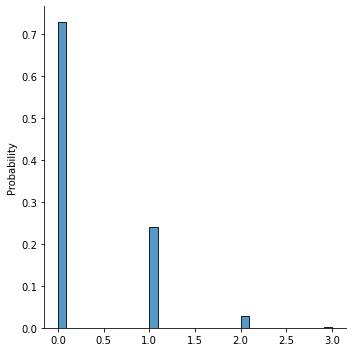

In [33]:
from scipy.stats import binom
# Let's generate some simulated data that follow a binomial distribution and plot the distibuion of this simulated data
# we will say use n=3 and p=0.1 and simulate 10000 randon variables ~Binom(3,0.1)
n=3
p=0.1
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')

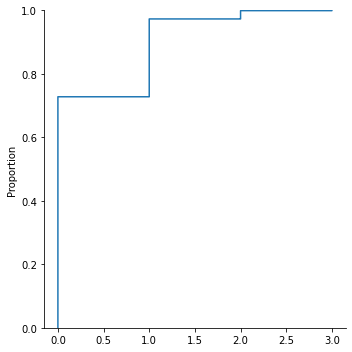

In [398]:
# Plotting the emperical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax1=sns.displot(binomial_rvs,kind='ecdf')

In [399]:
# Now usng the theoretical probability distributions for stats.binom
# Machine 1,2,3 are either working or not working, each machine independnetly has a 10% chance of being down
# you can have {0,1,2,3} machines workinng or not working
# We will work with this modeling the random variable x as a binomial probability distirbution
# What is the probability of each of these numbers of working or not working machines? 
# What is the probability of k= the number of successes (let's define this as machine not working) that you get out of 3 machines running
n=3
p=0.1
x=np.arange(0,n+1)
binomial_pmf=binom.pmf(x,n,p)
print(binomial_pmf)
# the probabilities of having 0,1,2,3 successes

[0.729 0.243 0.027 0.001]


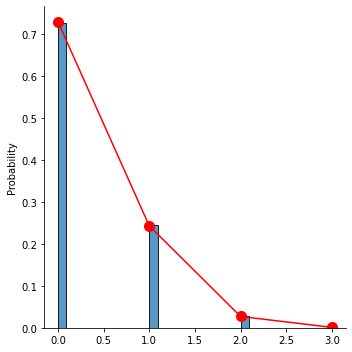

In [400]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')
ax2=plt.plot(x,binomial_pmf, 'ro',ms=10)
ax3=plt.plot(x,binomial_pmf, 'r')

In [401]:
# find the cdf of the binomial distribution using the probability distribution parameters
x=np.arange(0,n+1)
binomial_cdf=binom.cdf(x,n,p)
print(binomial_cdf)

[0.729 0.972 0.999 1.   ]


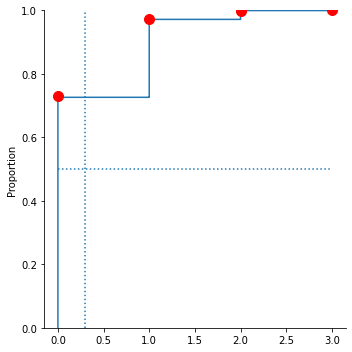

In [402]:
# Plotting the cdf points
ax=sns.displot(binomial_rvs,kind='ecdf')
ax=plt.plot(x,binomial_cdf, 'ro',ms=10)
plt.hlines(0.5,0,3,linestyle=":")
plt.vlines(0.3,0,1,linestyle=":")

In [403]:
# expected value or mean of the distribution
# n= 3, p = 0.10
# for every 3 machines that are running, about 0.3 machines will not be working, on average
binom.mean(n,p)

0.30000000000000004

[0 0 0 ... 0 0 0]


Text(0.5, 6.79999999999999, 'number of birthday matches= n')

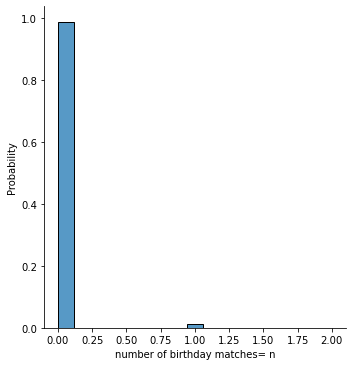

In [396]:
# Birthday problem binomial 
# 0 out of 5 at high prob
# 1 out of 5 at low prob
# more than 1 out of 5 very very small
n=5
p=0.0027
binomial_rvsBD=binom.rvs(n,p,size=50000)
ax1=sns.displot(binomial_rvsBD,stat='probability')
print(binomial_rvsBD)
plt.xlabel("number of birthday matches= n")

In [372]:
n=5
x=np.arange(0,n+1)
binomial_pmfBD=binom.pmf(x,n,0.0027)
print(binomial_pmfBD)

[9.86572703e-01 1.33547894e-02 7.23111029e-05 1.95768553e-07
 2.65003055e-10 1.43489070e-13]


P(no people out of 5 with same specific birthday) = 0.986

P(at least 1 people with same specific birthday, n=1=number of matches) = 1 - 0.986 = 0.014

This is a binomial distribution of the number of matches within a group size.  

What is the probability of have exactly n=2 matches in a group of 5?

can use the Binomial distribution  
PMF(x=k) = (n choose k) * p^k * q^(n-k) to model and calculate these

In [419]:
binom.pmf(2,5,.0027)

7.231110288810927e-05

In [387]:
n=5
x=np.arange(0,n+1)
binomial_cdfBD=binom.cdf(x,n,0.0027)
print(binomial_cdfBD)

[0.9865727  0.99992749 0.9999998  1.         1.         1.        ]


# The Poisson distribution
Use the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html). It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified interval types such as distance, area or volume.  ~Pois(rate=lamda=$\lambda$)   

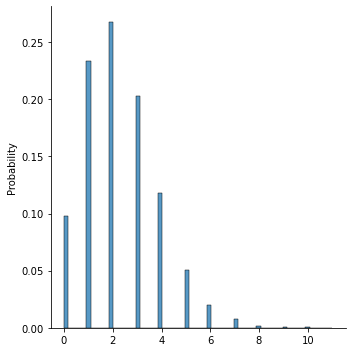

In [266]:
from scipy.stats import poisson
# first again we will look at simulating some data that follow a Poisson distribution
rateA=2.3
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')

Compare this with using the poisson distribution to find probabilities.  If we state that the rate = 2.3 deaths from typhoid fever over a 1-year period, when you assume that the underlying distribution for annual death from typhoid fever is a Poisson distribution, find the probabilitys of the number of deaths.

In [267]:
xPoisson=np.arange(0,10,1)
poisson_pmf=poisson.pmf(xPoisson,rateA)
print(poisson_pmf)
# the probability of count of the number of deaths in 1 year

[0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503
 0.02061376 0.00677309 0.00194726 0.00049763]


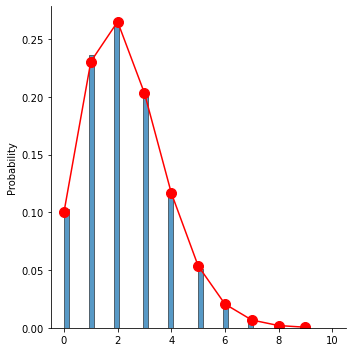

In [268]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')
ax2=plt.plot(xPoisson,poisson_pmf, 'ro',ms=10)
ax3=plt.plot(xPoisson,poisson_pmf, 'r')

In [269]:
# Probability of x=3 deaths/year?
poisson_pmf=poisson.pmf(3,rateA)
print(poisson_pmf)

0.20330822526255884


In [270]:
# Probability less than some value
# Probability of 3 or less deaths/year?
P1=poisson.cdf(3,rateA)
print(P1)

0.7993470511946271


From the above values of the pmf you can add these probabilities to get the same number [0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503, 0.02061376 0.00677309 0.00194726 0.00049763]

In [271]:
# P(3 or less deaths/year)
0.1003+0.2306+0.2652+0.2033

0.7994

In [272]:
# Probability greater than some value
# Remember the first couple of laws of probabiity: all possible probabilities sum to 1 and the complement rule
# What is the probability of havinng more than 6 deaths/year?
P2=1-(poisson.cdf(6,rateA))
print(P2)

0.009361933891041896


In [281]:
# can check by adding the pmf at x=7,8,9,10...
0.00677+0.00195+0.0005

0.00922